In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Titanic Data Analysis

In [80]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

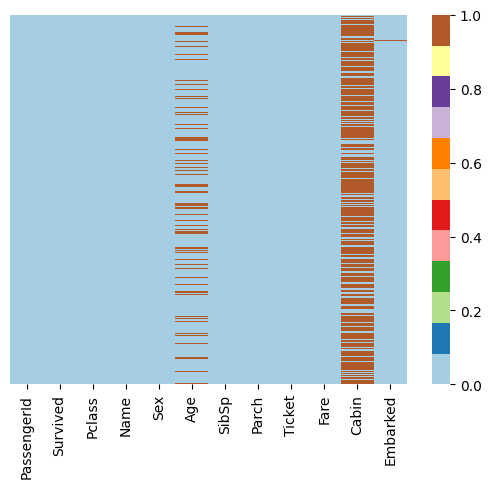

In [3]:
# Checking which null values we have
sns.heatmap(data.isnull(), yticklabels=False, cmap='Paired')

<Axes: xlabel='Pclass', ylabel='Age'>

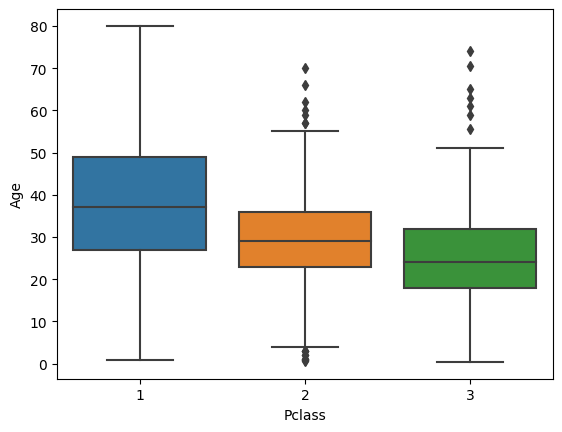

In [4]:
# Check for avg age according to each class
sns.boxplot(x='Pclass', y='Age', data=data)

In [5]:
# Making a function to fill the age according to its class age avg
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return data[data['Pclass'] == 1]['Age'].mean()
        elif Pclass == 2:
            return data[data['Pclass'] == 2]['Age'].mean()
        else: 
            return data[data['Pclass'] == 3]['Age'].mean()
    else: 
        return Age

data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis=1)

# Since there are most null values in Cabin I decided to drop the column
data.drop(columns='Cabin', inplace=True)

# Droping any other null values if any
data.dropna(inplace=True)

<Axes: >

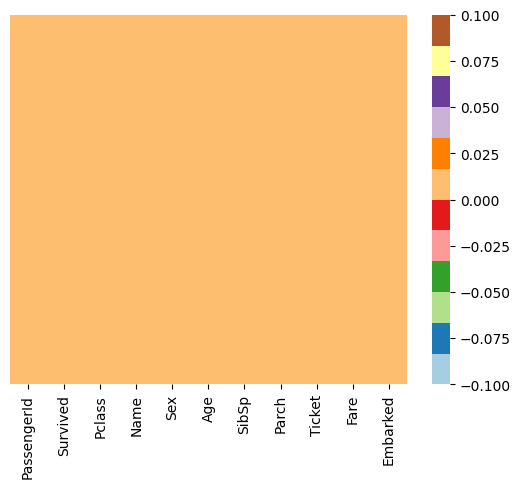

In [6]:
# Checking if there are any other null values, if yes then drop
sns.heatmap(data.isnull(), yticklabels=False, cmap='Paired')

<Axes: xlabel='Survived', ylabel='count'>

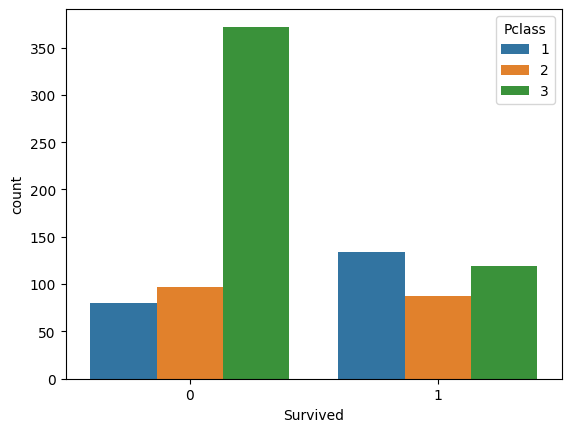

In [7]:
# Making a plot to see people from which class survived the most
sns.countplot(x='Survived', data=data, hue='Pclass')

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
# Checking how many people survived from Class 1
data[(data['Pclass'] == 1) & (data['Survived'] == 1)].count()['Survived']

134

In [10]:
# Checking how many people died from Class 1
data[(data['Pclass'] == 1) & (data['Survived'] == 0)].count()['Survived']

80

In [11]:
# Checking how many people survived from Class 2
data[(data['Pclass'] == 2) & (data['Survived'] == 1)].count()['Survived']

87

In [12]:
# Checking how many people died from Class 2
data[(data['Pclass'] == 2) & (data['Survived'] == 0)].count()['Survived']

97

In [13]:
# Checking how many people survived from Class 3
data[(data['Pclass'] == 3) & (data['Survived'] == 1)].count()['Survived']

119

In [14]:
# Checking how many people died from Class 3
data[(data['Pclass'] == 3) & (data['Survived'] == 0)].count()['Survived']

372

In [309]:
dataTickets = data.copy()

In [310]:
# Checking how many groups they where

dataTickets['Ticket'].nunique()

681

In [311]:
dataTickets = dataTickets.groupby(by='Ticket', as_index=0).count()[['Ticket', 'PassengerId']]

In [313]:
dataTickets.rename({'PassengerId': 'Total_of_People'}, axis=1, inplace=True)

In [314]:
dataTickets['Total_of_People'].astype(int)

0      3
1      3
2      2
3      1
4      1
      ..
676    4
677    1
678    1
679    1
680    2
Name: Total_of_People, Length: 681, dtype: int32

In [315]:
dataTickets[dataTickets['Total_of_People'] >= 2].count()

Ticket             134
Total_of_People    134
dtype: int64

In [316]:
dataTickets.sort_values(by='Total_of_People', ascending=False)

,Ticket,Total_of_People
80,1601,7
568,CA. 2343,7
333,347082,7
566,CA 2144,6
337,347088,6
...,...,...
300,345572,1
299,345364,1
298,343276,1
297,343275,1


In [320]:
data.groupby(by='Ticket', as_index=0).sum()[['Survived', 'Ticket']]

C:\Users\Josef\AppData\Local\Temp\ipykernel_34492\1744360459.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Survived,Ticket
0,3,110152
1,2,110413
2,0,110465
3,1,110564
4,1,110813
...,...,...
676,0,W./C. 6608
677,0,W./C. 6609
678,0,W.E.P. 5734
679,0,W/C 14208


In [335]:
dataTickets['Total_of_Deaths'] = data.groupby(by='Ticket', as_index=0).count()['Survived'] - data.groupby(by='Ticket', as_index=0).sum()['Survived']

C:\Users\Josef\AppData\Local\Temp\ipykernel_34492\2221248806.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [348]:
dataTickets['Percentage_of_Deaths'] = dataTickets['Total_of_Deaths'] / dataTickets['Total_of_People'] * 100

In [349]:
dataTickets['Percentage_of_Deaths'] = dataTickets['Percentage_of_Deaths'].astype(int)

In [350]:
dataTickets['Percentage_of_Deaths']

0        0
1       33
2      100
3        0
4        0
      ... 
676    100
677    100
678    100
679    100
680     50
Name: Percentage_of_Deaths, Length: 681, dtype: int32

In [351]:
dataTickets['Total_of_People']

0      3
1      3
2      2
3      1
4      1
      ..
676    4
677    1
678    1
679    1
680    2
Name: Total_of_People, Length: 681, dtype: int64

In [352]:
dataTickets[dataTickets['Percentage_of_Deaths'] == 100].count()['Percentage_of_Deaths'] * dataTickets['Total_of_People'] / 100

0      12.63
1      12.63
2       8.42
3       4.21
4       4.21
       ...  
676    16.84
677     4.21
678     4.21
679     4.21
680     8.42
Name: Total_of_People, Length: 681, dtype: float64

In [353]:
dataTickets['Percentage_from_Total'] = dataTickets['Total_of_Deaths'] / dataTickets['Total_of_Deaths'].sum() * 100

In [354]:
dataTickets['Percentage_from_Total'].sum()

99.99999999999997

# Graphs

Some graps that helped study and analise this case

In [279]:
import cufflinks as cf
cf.go_offline()


In [280]:
data['Pclass'].iplot(kind='hist')

In [281]:
data['Age'].iplot(kind='hist')

In [282]:
data['SibSp'].iplot(kind='hist')

In [283]:
data['Sex'].iplot(kind='hist')

In [284]:
data['Parch'].iplot(kind='hist')

<Axes: xlabel='Pclass', ylabel='Age'>

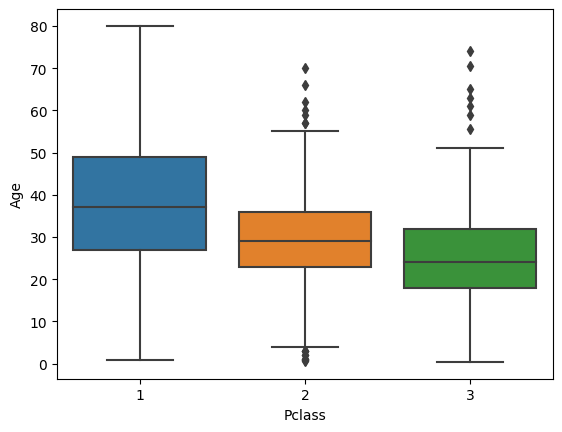

In [285]:
sns.boxplot(x='Pclass', y='Age', data=data)

# Classes: 3

1ª Class:	134 survivors and 80 deaths <br>
2ª Class:	87 survivors and 97 deaths <br>
3ª Class:	119 survivors and 372 deaths <br>

# Groups

<b>681</b> tickets Sold in total <br>
which <b>134</b> tickets were for two or more people <br>
and <b>547</b> for singles.

The tickets who had more deaths were <b>347082</b> and <b>CA. 2343</b> with a total of <b>7</b> deaths and that represents <b>2,55%</b> from the total of deaths <br>

In total <b>421</b> unique tickets had <b>100%</b> of fatalities, that represents <b>494</b> people which is <b>55%</b> of the total of people<br>
In total <b>49</b> unique tickets had survivors, that represents <b>127</b> people which is <b>14,25%</b> of the total of people<br>
In total <b>211</b> unique tickets everyone survived, that represents <b>270</b> people which is <b>30,30%</b> of the people<br>

In [610]:
dataTickets[dataTickets['Total_of_People'] > 1].count()

Ticket                   134
Total_of_People          134
Total_of_Deaths          134
Percentage_of_Deaths     134
Percentage_from_Total    134
dtype: int64

In [524]:
dataTickets['Ticket'].count() # 681 tickets

681

In [536]:
dataTickets[dataTickets['Total_of_People'] >= 2 ].count() # 134 groups of two or more people

Ticket                   134
Total_of_People          134
Total_of_Deaths          134
Percentage_of_Deaths     134
Percentage_from_Total    134
dtype: int64

In [549]:
dataTickets[['Ticket', 'Total_of_Deaths']].sort_values(by='Total_of_Deaths', ascending=False).head() # Tickets 341082 and CA. 2343 - 7 Deaths

,Ticket,Total_of_Deaths
333,347082,7
568,CA. 2343,7
337,347088,6
566,CA 2144,6
249,3101295,6


In [605]:
all_deaths = dataTickets[dataTickets[['Percentage_of_Deaths']] == 100].count()['Percentage_of_Deaths']
all_deaths  # 421 tickets with 100% fatalities

has_survivors = dataTickets[(dataTickets[['Percentage_of_Deaths']] > 0) & (dataTickets[['Percentage_of_Deaths']] < 100)].count()['Percentage_of_Deaths']
has_survivors # 49 tickets with survivors
 
all_survivors = dataTickets[dataTickets[['Percentage_of_Deaths']] == 0].count()['Percentage_of_Deaths']
all_survivors # 211 tickets with 100% survivors

dataGroups = pd.DataFrame(data=[[all_survivors, has_survivors, all_deaths]], columns=[['All_Survived', 'Has_Survivors', 'All_Deaths']])
dataGroups

,All_Survived,Has_Survivors,All_Deaths
0,211,49,421


<Axes: >

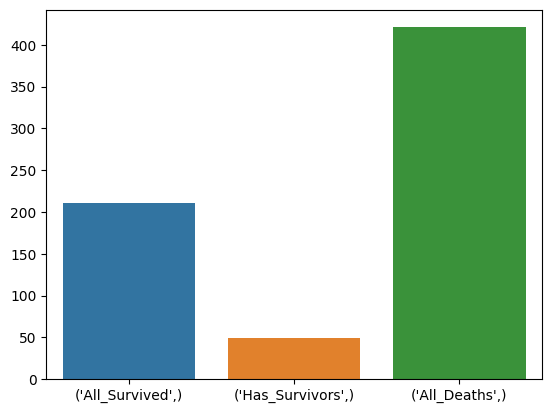

In [617]:
sns.barplot(dataGroups)

# Ages

The average age were: <br>

1º Class: <b>38</b> years old, with a total of <b>216</b> people and an average fare of: <b>$84</b><br>
2º Class: <b>29</b> years old, with a total of <b>184</b> people and an average fare of: <b>$20</b><br>
3º Class: <b>25</b> years old, with a total of <b>491</b> people and an average fare of: <b>$13</b><br>

In [645]:
dataAge = pd.merge(left=data.groupby(by='Pclass', as_index=0)[['PassengerId']].count(), right=data.groupby(by='Pclass', as_index=0)[['Age','Fare']].mean(), on='Pclass', how='inner')
dataAge.drop('PassengerId', axis=1, inplace=True)
dataAge['Age'] = dataAge['Age'].astype(int)
dataAge['Fare'] = dataAge['Fare'].round(2)
dataAge

,Pclass,Age,Fare
0,1,38,84.15
1,2,29,20.66
2,3,25,13.68


<Axes: xlabel='Age', ylabel='Fare'>

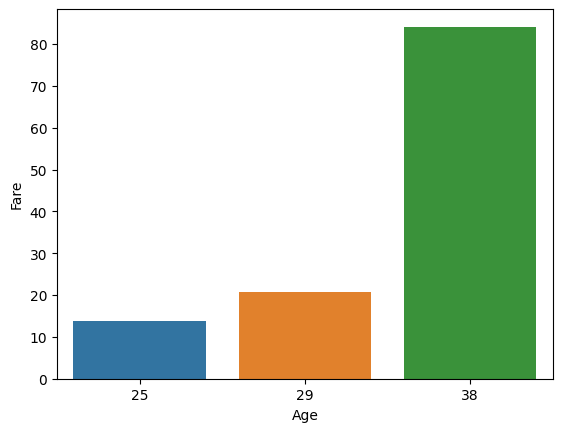

In [646]:
sns.barplot(x='Age', y='Fare', data=dataAge)

# Doctors

They were: <b>7</b> Doctors which only <b>3</b> survived <br>
There were <b>5</b> in 1º class and <b>2</b> in 2º class <br>

All of the doctors that survived were from the first class, <br>
they paid in average <b>$49</b> per ticket with <b>$133.65</b> being the maximum and <b>$10.5</b> the lowest. 

In [647]:
dataProfessions = data[data['Name'].str.contains(', Dr.')][['Survived', 'Name', 'Pclass', 'Fare']]
dataProfessions['Fare'] = dataProfessions['Fare'].round(2)
dataProfessions


,Survived,Name,Pclass,Fare
245,0,"Minahan, Dr. William Edward",1,90.00
317,0,"Moraweck, Dr. Ernest",2,14.00
398,0,"Pain, Dr. Alfred",2,10.50
632,1,"Stahelin-Maeglin, Dr. Max",1,30.50
660,1,"Frauenthal, Dr. Henry William",1,133.65
766,0,"Brewe, Dr. Arthur Jackson",1,39.60
796,1,"Leader, Dr. Alice (Farnham)",1,25.93


# Sex

They were <b>577</b> male passengers which only <b>109</b> survived, which represents <b>14,75%</b> from the total deaths <br>
They were <b>314</b> female passengers which only <b>233</b> survived, which represents <b>85,24%</b> from the total deaths

In [521]:
dataSex = pd.merge(left=data.groupby(by='Sex', as_index=0)[['PassengerId']].count(), right=data.groupby(by='Sex', as_index=0)[['Survived']].sum(), how='inner', on='Sex')
dataSex['Deaths'] = dataSex['PassengerId'] - dataSex['Survived']
dataSex['Percentage_of_Deaths'] = dataSex['Deaths'] / dataSex['PassengerId'] * 100
dataSex['Percentage_of_Deaths_Total'] = dataSex['Deaths'] / dataSex['Deaths'].sum() * 100
dataSex

,Sex,PassengerId,Survived,Deaths,Percentage_of_Deaths,Percentage_of_Deaths_Total
0,female,314,233,81,25.796178,14.754098
1,male,577,109,468,81.109185,85.245902


<Axes: xlabel='Survived', ylabel='Sex'>

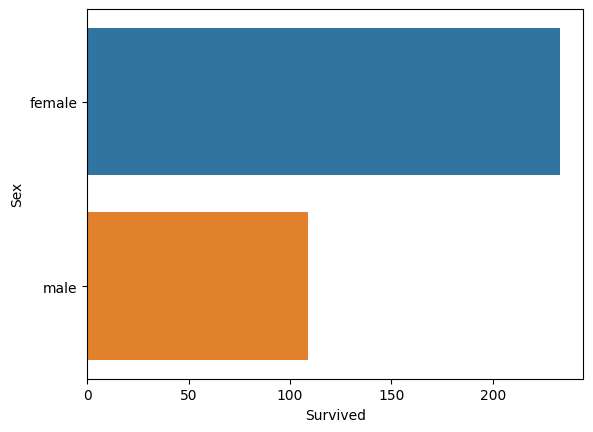

In [653]:
sns.barplot(x='Survived', y='Sex', data=dataSex)

<Axes: xlabel='Deaths', ylabel='Sex'>

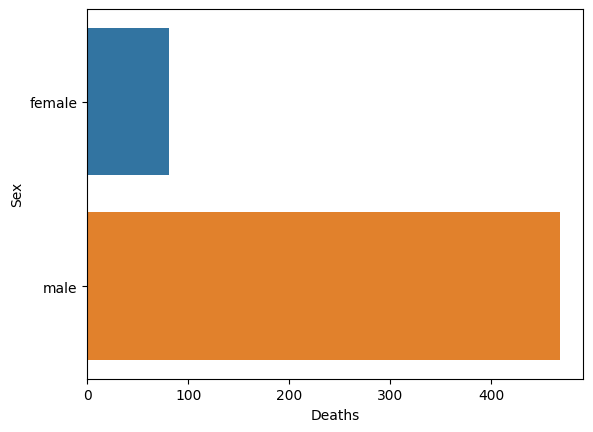

In [650]:
sns.barplot(x='Deaths', y='Sex', data=dataSex)